                            TASK-4 SALES PREDICTION USING PYTHON

IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

LOADING DATASET

In [2]:
sales_df = pd.read_csv("advertising.csv")

In [3]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales_df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
sales_df.shape

(200, 4)

In [6]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


CHECKING IF THERE ARE ANY NULL VALUES 

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
print(sales_df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


From this it is clear that our dataset is having no null values, that is there is no missing data 

VISUALIZING OUR DATASET

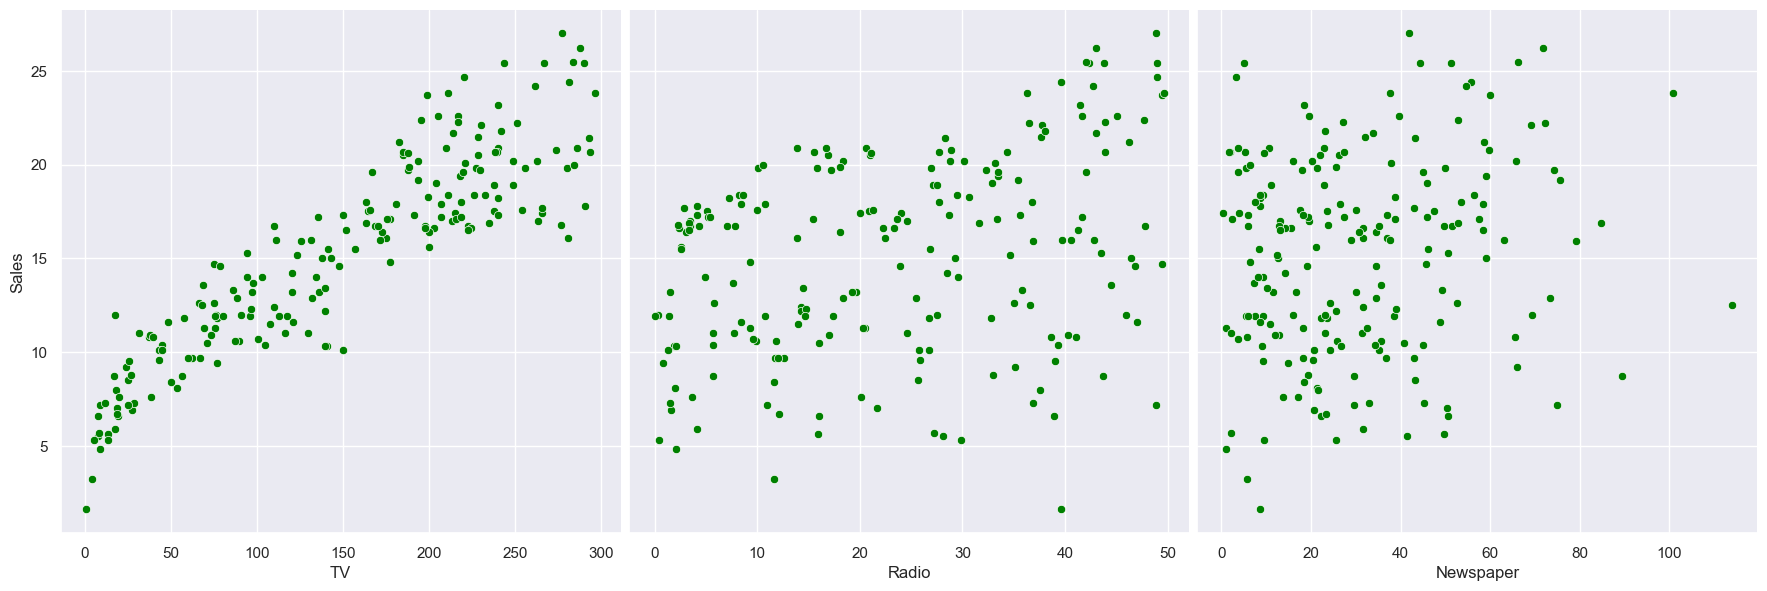

In [9]:
#In this code we are creating  pair plots , showing scatter plots between the 'Sales' variable and each of the 'TV', 'Radio', and 'Newspaper' variables in the DataFrame
import warnings
warnings.filterwarnings("ignore")
sns.set()
scatter_color = 'green'
sns.pairplot(sales_df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter', height=6, aspect=1,plot_kws={'color': scatter_color})

From the above visualizations it is clear that the Sales increases when the advertising cost increases in the TV Ads more gradually

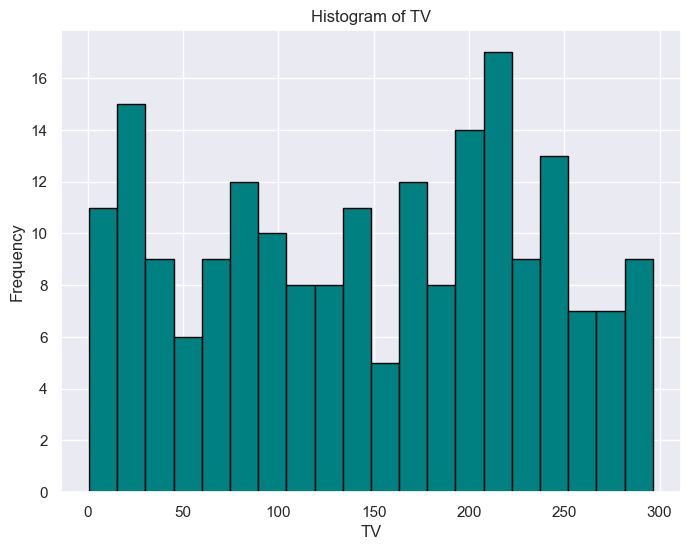

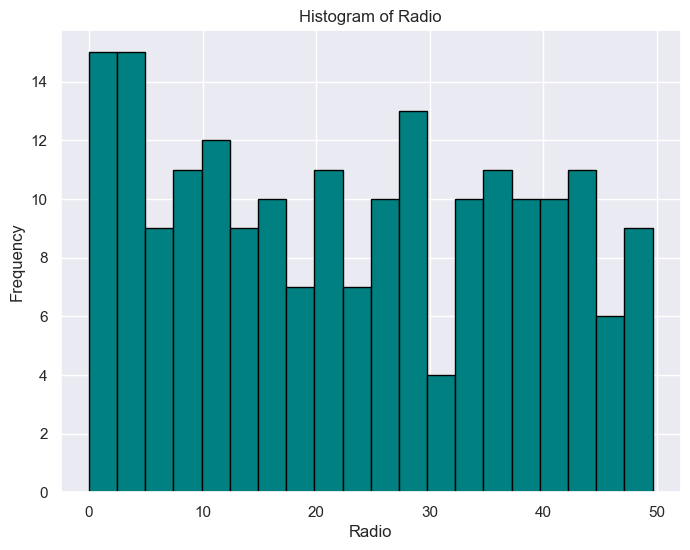

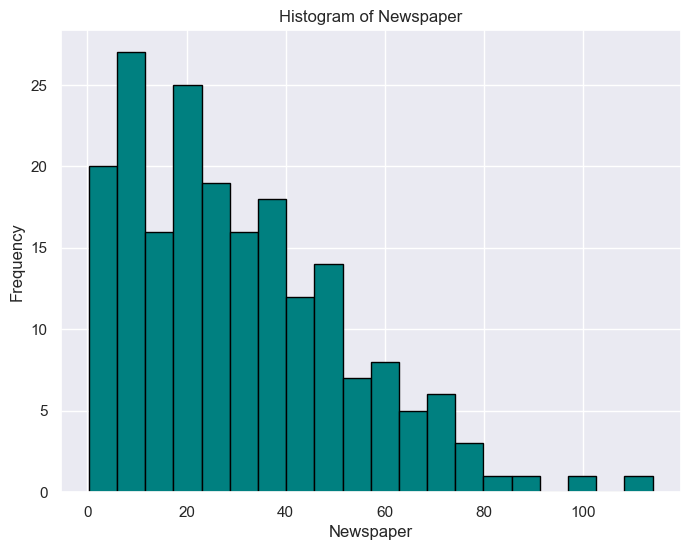

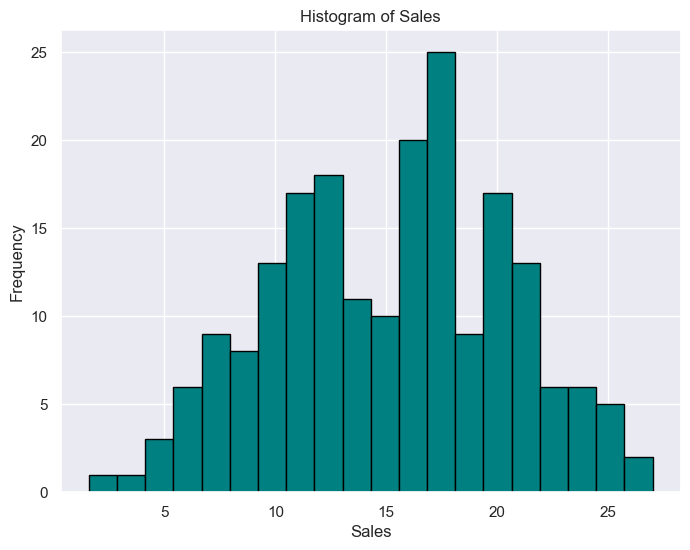

In [10]:
# Plotting histograms for better visualization 
for column in sales_df.columns:
    plt.figure(figsize=(8, 6))
    # applying color to the histograms
    peacock_green_rgb = (0, 128, 128)
    peacock_green_rgb_normalized = [x / 255.0 for x in peacock_green_rgb]
    # giving specifications and title for plotting histograms for all aspects
    plt.hist(sales_df[column], bins=20, edgecolor='black',color=peacock_green_rgb_normalized)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

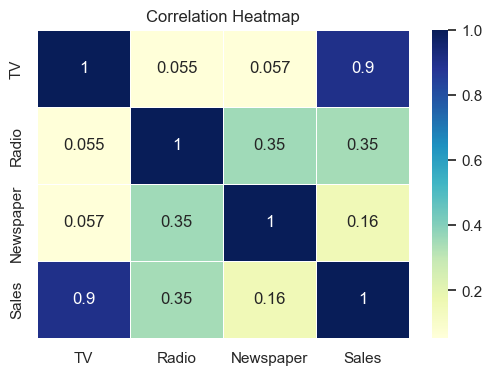

In [11]:
# creating correlation heatmap for our data
plt.figure(figsize=(6,4))
sns.heatmap(sales_df.corr(), annot=True,cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

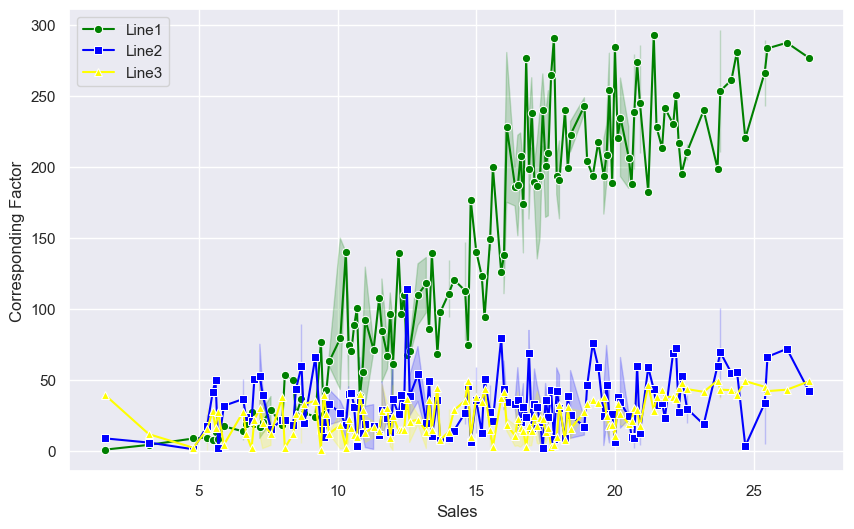

In [12]:
# plotting lineplot for all three columns wrt sales
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_df, x='Sales', y='TV', label='Line1', marker='o',color='green')
sns.lineplot(data=sales_df, x='Sales', y='Newspaper', label='Line2', marker='s',color='blue')
sns.lineplot(data=sales_df, x='Sales', y='Radio', label='Line3', marker='^',color='yellow')

# Adding labels 
plt.xlabel('Sales')
plt.ylabel('Corresponding Factor')

# Adding legend
plt.legend()

# Display the plot
plt.show()

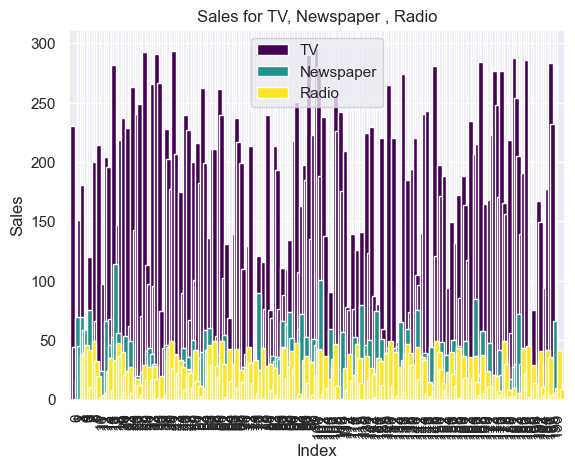

In [13]:
# now we are plotting a bar plot showing grouped visualization 
ax = sales_df[['TV','Newspaper','Radio']].plot(kind='bar',width=6,colormap='viridis')
ax.set_xlabel("Index")
ax.set_ylabel("Sales")
ax.set_title("Sales for TV, Newspaper , Radio")
plt.show()

CREATING AND TRAINING OUR MODEL

In [14]:
X= sales_df.drop(columns='Sales')
Y=sales_df['Sales']

In [15]:
# splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=3)

In [16]:
print(Y_test)

40     16.6
51     10.7
139    20.7
197    14.8
170     8.4
82     11.3
183    26.2
46     10.6
70     18.3
100    16.7
179    17.6
83     13.6
25     17.0
190    10.8
159    12.9
173    16.7
95     16.9
3      16.5
41     17.1
58     23.8
14     19.0
143    10.4
12      9.2
6      11.8
182     8.7
161    13.3
128    24.7
122    16.6
101    23.8
86     12.0
64     16.0
47     23.2
158     7.3
34     11.9
38     10.1
196    14.0
4      17.9
72      8.8
67     13.4
145    10.3
156    15.3
115    12.6
155     3.2
15     22.4
61     24.2
175    27.0
120    15.5
130     1.6
23     20.5
153    16.0
31     11.9
103    19.7
89     16.7
132     5.7
109    19.8
126     6.6
17     24.4
30     21.4
178    16.8
162    19.9
Name: Sales, dtype: float64


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [18]:
prediction = model.predict(X_test)
print(prediction)

[17.94221632 11.28731032 19.36406753 15.25309499  8.85035488 11.08345095
 24.54827272 10.72184726 18.64190205 17.03877174 14.71887065 13.30204368
 19.10529921 11.4654086  13.82417942 14.56139355 16.86156735 17.27369971
 17.78634747 21.28201581 19.1397699  11.05346066  9.93276334 11.49854807
  8.5309559  13.26073545 21.75566382 16.96066432 24.25791572 11.92392893
 16.40376866 21.96064207  9.51770237 10.16209996 10.08141197 10.45644324
 15.54919097  9.92133897 13.83425453 12.54320065 14.5093965  12.61758414
  6.46804914 20.25656292 23.16303373 24.65508581 15.20817964  9.27513655
 18.72004324 18.16217728 12.73063894 16.65175796 15.79776032  8.36188762
 21.22771856  9.52094834 23.88078008 23.29062902 19.6930198  16.76467522]


In [19]:
model.intercept_

5.022730805826264

In [20]:
model.coef_

array([ 0.05223455,  0.10672463, -0.00120158])

In [21]:
# Checking the accuracy of our model
Accuracy = model.score(X_test,Y_test)*100

In [22]:
print("Accuracy: ",Accuracy)

Accuracy:  88.77675297095178
